In [ ]:
import pandas as pd
import numpy as np
import string
import spacy
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow import keras

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import re

In [ ]:
Kisan = pd.read_csv('/content/Kisan Call center Queries.csv',on_bad_lines='skip')

In [ ]:
Kisan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178939 entries, 0 to 178938
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   questions  178939 non-null  object
 1   answers    178816 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [ ]:
Kisan.head(3)

,questions,answers
0,asking about the control measure for aphid inf...,suggested him to spray rogor@2ml/lit.at evenin...
1,asking about the control measure of flower dro...,suggested him to apply fertilizer in recommend...
2,asking about how to avail kisan credit card lo...,suggested to consult with officer-marketing an...


In [ ]:
Kisan.tail(3)

,questions,answers
178936,farmer asking query regarding sowing time of b...,sowing time of banana: march-may.\npit size: 4...
178937,asking that his 2 goat are suffering.,tr.: 1. avil tab. 10 no.s @ 1 tab. orally twic...
178938,asking about plant protection in pumpkin,--


In [ ]:
#Display initial missing values
print("Missing Values Before Before Cleaning ")
print(Kisan.isnull().sum())

Missing Values Before Before Cleaning 
questions      0
answers      123
dtype: int64


In [ ]:
#Handling missing values
Kisan = Kisan.dropna(thresh=len(Kisan)*0.5,axis=1)

In [ ]:
#Fill missing numerical values with mean
Kisan.fillna(Kisan.mean(numeric_only=True),inplace=True)

In [ ]:
for col in Kisan.select_dtypes(include=['object']).columns:
  Kisan[col].fillna(Kisan[col].mode()[0],inplace=True)

<ipython-input-12-271157b43c5b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Kisan[col].fillna(Kisan[col].mode()[0],inplace=True)


In [ ]:
Kisan.ffill(inplace=True)
Kisan.bfill(inplace=True)

In [ ]:
print("Missing Values After Cleaning")
print(Kisan.isnull().sum())

Missing Values After Cleaning
questions    0
answers      0
dtype: int64


In [ ]:
Kisan.to_csv("Cleaned_Dataset.csv",index=False)
print(Kisan.head())

                                           questions  \
0  asking about the control measure for aphid inf...   
1  asking about the control measure of flower dro...   
2  asking about how to avail kisan credit card lo...   
3      asking about source of early ahu rice variety   
4  asking that he has not got proper friut from h...   

                                             answers  
0  suggested him to spray rogor@2ml/lit.at evenin...  
1  suggested him to apply fertilizer in recommend...  
2  suggested to consult with officer-marketing an...  
3  suggested to take early ahu rice variety from ...  
4  suggested him to aplly recommended fertilizer ...  


In [ ]:
# Duplicate Removal Summary:

In [ ]:
dupliacte_rows = Kisan[Kisan.duplicated()]
dupliacte_count_before = dupliacte_rows.shape[0]
Kisan = Kisan.drop_duplicates()
dupliacte_count_after = Kisan[Kisan.duplicated()].shape[0]
print("Duplicate row Before Removal:")
print(dupliacte_count_before)
print("Duplicate row After Removal:")
print(dupliacte_count_after)

Duplicate row Before Removal:
37839
Duplicate row After Removal:
0


In [ ]:
#Identify duplicates before removal
dupliacte_rows = Kisan[Kisan.duplicated()]
dupliacte_count_before = dupliacte_rows.shape[0]

In [ ]:
#Remove duplicates (keeping the first occurrence)
Kisan_cleaned = Kisan.drop_duplicates(keep='first')
dupliacte_count_after = Kisan_cleaned.duplicated().sum()

In [ ]:
#Compare dataset shape before and after
Kisan_shape_before = Kisan.shape[0]
Kisan_shape_after = Kisan_cleaned.shape[0]

In [ ]:
print(f"Total Duplicates Before Removal: {dupliacte_count_before}")
print(f"Total Duplicates After Removal: {dupliacte_count_after}")
print(f"Dataset Shape Before: {Kisan_shape_before}")
print(f"Dataset Shape After: {Kisan_shape_after}")

Total Duplicates Before Removal: 0
Total Duplicates After Removal: 0
Dataset Shape Before: 141100
Dataset Shape After: 141100


In [ ]:
# Checking for Inconsistencies

In [ ]:
missing_values = Kisan.isnull().sum()
print("Missing Values:")


Missing Values:


In [ ]:
dupliacte_count = Kisan.duplicated().sum()

In [ ]:
non_string_questions = Kisan[~Kisan["questions"].apply(lambda x: isinstance(x, str))]
non_string_answers = Kisan[~Kisan["answers"].apply(lambda x: isinstance(x, str))]

In [ ]:
Kisan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141100 entries, 0 to 178938
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   questions  141100 non-null  object
 1   answers    141100 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


In [ ]:
Kisan = Kisan.dropna()

In [ ]:
Kisan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141100 entries, 0 to 178938
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   questions  141100 non-null  object
 1   answers    141100 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


In [ ]:
def clean_text(text):
  if pd.isna(text):
   return text
  text = re.sub(r'[^a-zA-Z0-9\s]',' ',text)
  text = re.sub(r'\s+',' ' ,text).strip()
  return text


In [ ]:
Kisan['questions'] = Kisan['questions'].apply(clean_text)
Kisan['answers'] = Kisan['answers'].apply(clean_text)

In [ ]:
questions_Kisan = Kisan[['questions']].drop_duplicates().reset_index(drop=True)
answers_Kisan = Kisan[['answers']].drop_duplicates().reset_index(drop=True)

In [ ]:
#questions_Kisan.to_csv(questions_file,index=False)
#answers_Kisan.to_csv(answers_file,index=False)

In [ ]:
#print("Questions Table saved at:", questions_file)
#print("Answers Table saved at:", answers_file)


In [ ]:
# Activation Functions

In [ ]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))
def relu(x):
  return np.maximum(0,x)
def tanh(x):
  return np.tanh(x)


In [ ]:
x = np.linspace(-10,10,100)

In [ ]:
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

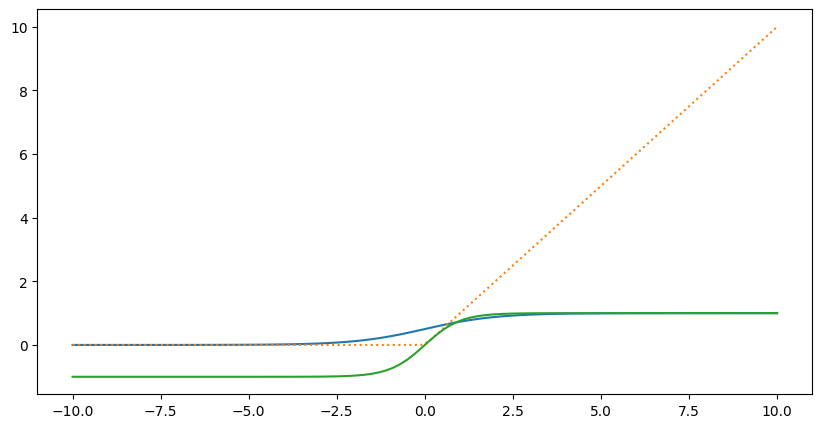

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x,y_sigmoid,label='sigmoid',linestyle='-')
plt.plot(x,y_relu,label='relu',linestyle='dotted')
plt.plot(x,y_tanh,label='tanh',linestyle='solid')

<ipython-input-39-70aa2b82fd9b>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


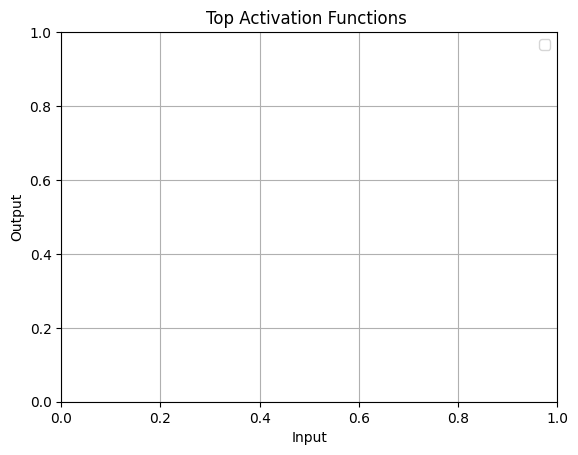

In [ ]:
plt.xlabel('Input')
plt.ylabel('Output')
plt.title("Top Activation Functions ")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Stop words

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Function to remove stop words
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  filtered_text = [word for word in words if word.lower()not in stop_words ]
  return ' '.join(filtered_text)


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
sample_text = "This is an example sentence demonstrating the removal of stopwords."
filtered_text = remove_stopwords(sample_text)

In [ ]:
print("Original Text:", sample_text)
print("Filtered Text:", filtered_text)

Original Text: This is an example sentence demonstrating the removal of stopwords.
Filtered Text: example sentence demonstrating removal stopwords .


In [ ]:
# Most Frequently Questions

In [ ]:
#Function to preprocess text
def preprocess_text(text):
    if pd.isna(text):
        return ""
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_words)


In [ ]:
Kisan['cleaned_questions'] = Kisan['questions'].apply(preprocess_text)

In [ ]:
question_counts = Counter(Kisan['cleaned_questions'])
most_frequent_questions = question_counts.most_common(20)


In [ ]:
print("Most Frequently Occurring Questions:")
for question, count in most_frequent_questions:
    print(f"{question}: {count} times")

Most Frequently Occurring Questions:
asking pm kisan samman nidhi yojona: 666 times
asking fertilizer dose: 456 times
query regarding pm kisan: 432 times
asking kisan credit card: 418 times
asking fertilizer dose coconut: 320 times
asking pm kisan maan dhan yojana: 312 times
asking fertilizer dose mustard: 244 times
asking treatment mastitis cow: 229 times
asking fertilizer dose potato: 216 times
query regarding pmkisan: 198 times
asking treatment diarrhoea cow: 187 times
asking nutrient management coconut: 181 times
asking pm kisan installment: 167 times
asking kcc loan: 164 times
new registration: 159 times
asking pest problem: 158 times
desease: 155 times
asking nutrient management: 149 times
asking control blight potato: 142 times
asked carp culture: 135 times


In [ ]:
# word Frequency Analysis

In [ ]:
#Define a custom stopwords list
custom_stopwords = set([
    "about", "the", "is", "and", "to", "of", "in", "for", "on", "with", "how", "that",
    "he", "has", "not", "got", "from", "his", "her", "what", "who", "where", "when",
    "why", "which", "it", "this", "a", "an", "by", "as", "at", "are", "we", "you", "your",
    "i", "me", "my", "mine", "our", "ours", "us", "they", "them", "their", "theirs", "be",
    "was", "were", "being", "been", "am", "is", "are", "do", "does", "did", "have", "had",
    "having", "can", "could", "should", "would", "may", "might", "will", "shall", "just",
    "so", "then", "than", "there", "here", "thus", "or", "but", "if", "because", "also"
])


In [ ]:
#Function to preprocess text
def preprocess_text(text):
  text = text.lower().translate(str.maketrans(' ',' ',string.punctuation))
  words = text.split()
  words = [word for word in words if word not in custom_stopwords]
  return words

In [ ]:
#Apply preprocessing
all_words = []
Kisan["questions"].dropna().apply(lambda x:all_words.extend(preprocess_text(x)))

,questions
0,None
1,None
2,None
3,None
4,None
...,...
178934,None
178935,None
178936,None
178937,None


In [ ]:
#Compute word frequency
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

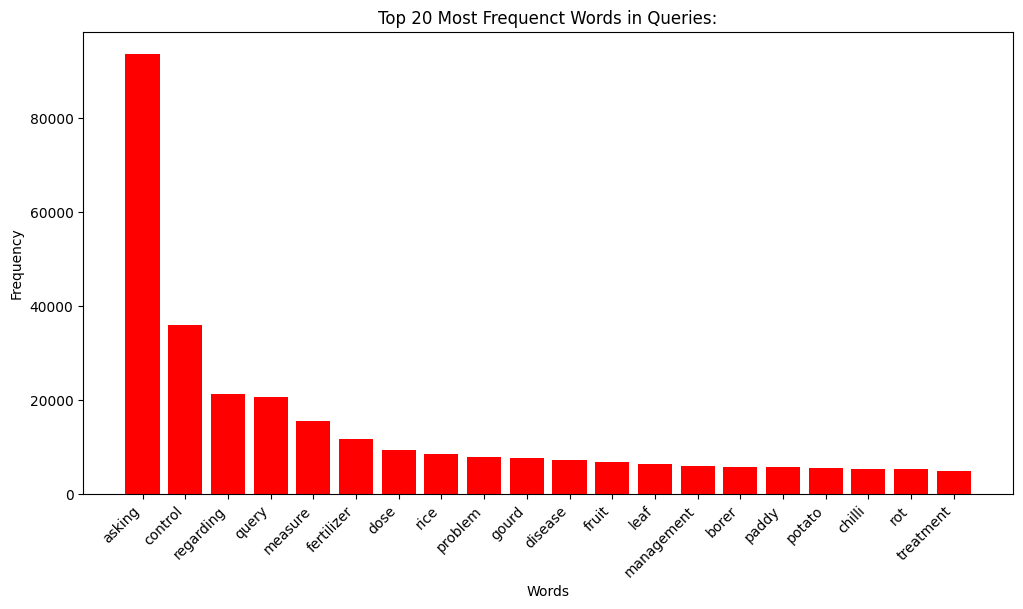

In [ ]:
#Plot Bar Chart
plt.figure(figsize=(12,6))
plt.bar(words,counts,color='Red')
plt.xticks(rotation=45,ha='right')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequenct Words in Queries:")
plt.show()


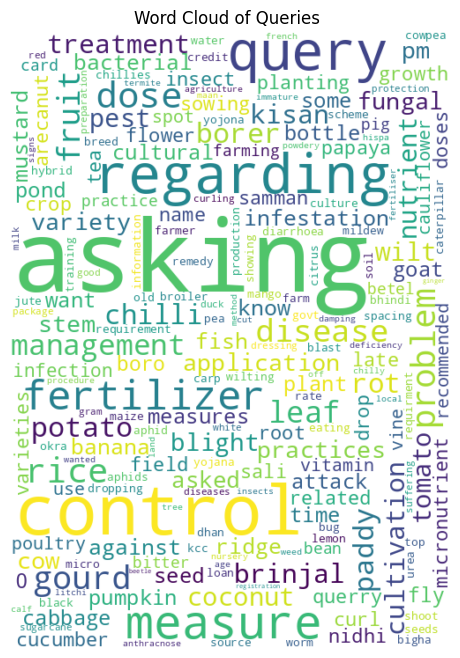

In [ ]:
#Generate Word Cloud
wordcloud = WordCloud(width=500,height=700,background_color='White').generate_from_frequencies(word_freq)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Queries ")
plt.show()

In [ ]:
# TF-IDF (Term Frequency Inverse Document Frequency)

In [ ]:
#Define a custom stopwords list
custom_stopwords = set(["asking",
"control"
"regarding "
"query "
"measure "
"fertilizer "
"problem"
"rice"
"dose "
"disease"
"fruit"
"gourd"
"leaf"
"borer"
"potato"
"management"
"chilli "
"paddy "
"kisan "
"cultivation"])

In [ ]:
#Function to preprocess text
def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Lowercase & remove punctuation
    words = text.split()  # Tokenize
    words = [word for word in words if word not in custom_stopwords]  # Remove stopwords
    return " ".join(words)

In [ ]:
#Apply preprocessing
Kisan["processed_questions"] = Kisan["questions"].dropna().apply(preprocess_text)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(Kisan["processed_questions"].dropna())


In [ ]:
#Get feature names and importance
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_dict = dict(zip(feature_names, tfidf_scores))


In [ ]:
#Get the top 20 important terms
sorted_tfidf = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:20]
words, scores = zip(*sorted_tfidf)


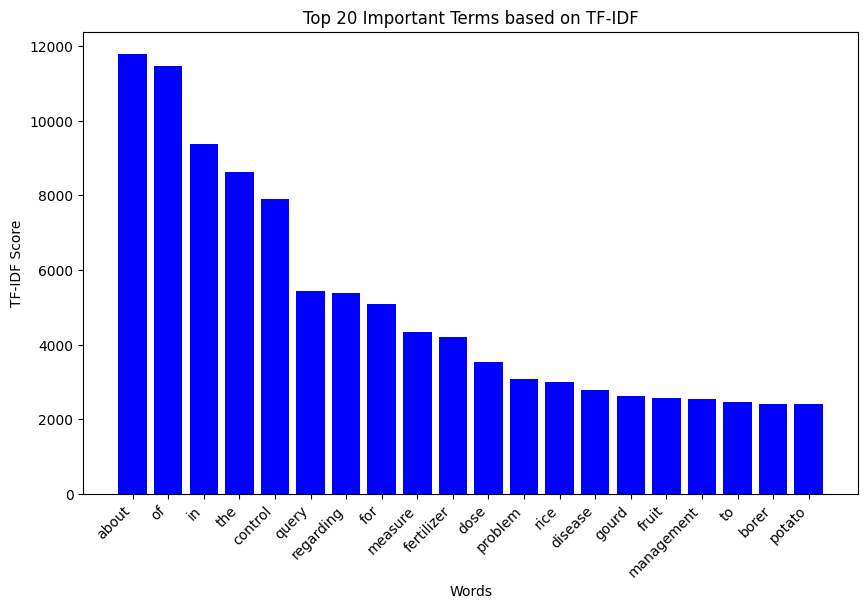

In [ ]:
#Plot Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(words, scores, color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.title("Top 20 Important Terms based on TF-IDF")
plt.show()

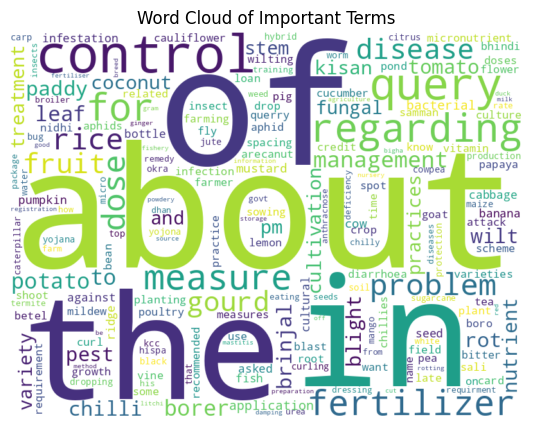

In [ ]:
#Generate Word Cloud
wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(tfidf_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Important Terms")
plt.show()


In [ ]:
# Named Entity Recognition(NER)

In [ ]:
#Define a custom stopwords list
custom_stopwords = set(["asking","control","regarding ","query ","measure ","fertilizer ","problem","rice" ,"dose ","disease","fruit","gourd","leaf","borer","potato","management","chilli ","paddy ","kisan ","cultivation"])

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Lowercase & remove punctuation
    words = text.split()  # Tokenize
    words = [word for word in words if word not in custom_stopwords]  # Remove stopwords
    return " ".join(words)


In [ ]:
#Apply preprocessing
Kisan["processed_questions"] = Kisan["questions"].dropna().apply(preprocess_text)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(Kisan["processed_questions"].dropna())


In [ ]:
#Get feature names and importance
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_dict = dict(zip(feature_names, tfidf_scores))



In [ ]:
#Get the top 20 important terms
sorted_tfidf = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:20]
words, scores = zip(*sorted_tfidf)


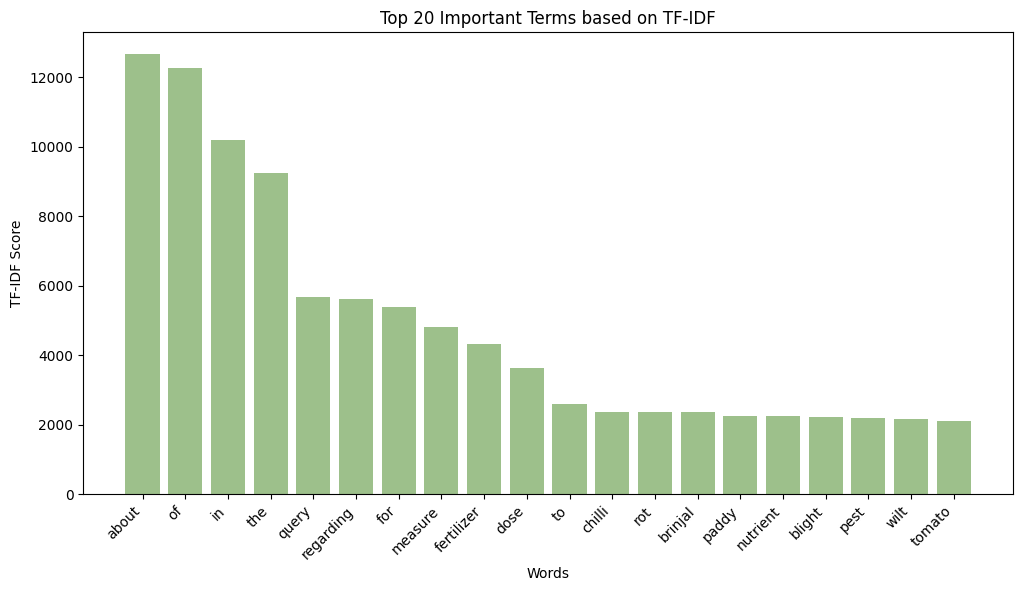

In [ ]:
# Plot Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(words, scores, color='#9DC08B')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.title("Top 20 Important Terms based on TF-IDF")
plt.show()

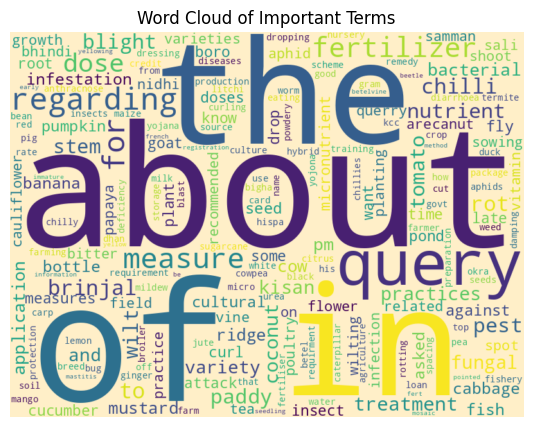

In [ ]:
## Generate Word Cloud
wordcloud = WordCloud(width=800, height=600, background_color='#FFEFC8').generate_from_frequencies(tfidf_dict)
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Important Terms")
plt.show()


In [ ]:
#Load Spacy NLP model
nlp = spacy.load("en_core_web_sm")

In [ ]:
def extract_entities(text):
    doc = nlp(text)
    crops, pests, locations = [], [], []
    for ent in doc.ents:
        if ent.label_ in ["GPE", "LOC"]:
            locations.append(ent.text)
        elif ent.label_ in ["ORG", "PRODUCT"]:
            crops.append(ent.text)
        elif ent.label_ in ["EVENT", "DISEASE"]:
            pests.append(ent.text)
    return {"Crops": crops, "Pests": pests, "Locations": locations}


In [ ]:
def extract_entities(text):
    doc = nlp(text)
    crops, pests, locations = [], [], []
    for ent in doc.ents:
        if ent.label_ in ["GPE", "LOC"]:
            locations.append(ent.text)
        elif ent.label_ in ["ORG", "PRODUCT"]:
            crops.append(ent.text)
        elif ent.label_ in ["EVENT", "DISEASE"]:
            pests.append(ent.text)
    return {"Crops": crops, "Pests": pests, "Locations": locations}

Kisan["Entities"] = Kisan["questions"].dropna().apply(extract_entities)
print(Kisan[["questions", "Entities"]].head())

                                           questions  \
0  asking about the control measure for aphid inf...   
1  asking about the control measure of flower dro...   
2  asking about how to avail kisan credit card lo...   
3      asking about source of early ahu rice variety   
4  asking that he has not got proper friut from h...   

                                      Entities  
0  {'Crops': [], 'Pests': [], 'Locations': []}  
1  {'Crops': [], 'Pests': [], 'Locations': []}  
2  {'Crops': [], 'Pests': [], 'Locations': []}  
3  {'Crops': [], 'Pests': [], 'Locations': []}  
4  {'Crops': [], 'Pests': [], 'Locations': []}  


In [ ]:
# Part of Speech (POS)

In [ ]:
nlp = spacy.load("en_core_web_sm")


In [ ]:
#Define a custom stopwords list
custom_stopwords = set(["asking","control","regarding ","query ","measure ","fertilizer ","problem","rice" ,"dose ","disease","fruit","gourd","leaf","borer","potato","management","chilli ","paddy ","kisan ","cultivation"])

In [ ]:
# Function to preprocess text (remove stopwords, punctuation, and tokenize)
def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Lowercase & remove punctuation
    words = text.split()  # Tokenize
    words = [word for word in words if word not in custom_stopwords]  # Remove stopwords
    return " ".join(words)

In [ ]:
# Apply preprocessing
Kisan["processed_questions"] = Kisan["questions"].dropna().apply(preprocess_text)
def pos_tagging(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]



In [ ]:
#Apply POS tagging
Kisan["POS_Tags"] = Kisan["processed_questions"].apply(pos_tagging)

In [ ]:
# Compute TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(Kisan["processed_questions"].dropna())


In [ ]:
# Get feature names and importance
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_dict = dict(zip(feature_names, tfidf_scores))


In [ ]:
# Get the top 20 important terms
sorted_tfidf = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:20]
words, scores = zip(*sorted_tfidf)


In [ ]:
#Kisan["Entities"] = Kisan["questions"].dropna().apply(extract_entities)
#print(Kisan[["questions", "Entities"]].head())

In [ ]:
# Plot Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(words, scores, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.title("Top 20 Important Terms based on TF-IDF")
plt.show()

In [ ]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='#578FCA').generate_from_frequencies(tfidf_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Important Terms")
plt.show()

In [ ]:
# Named Entity Recognition (NER)
def extract_entities(text):
    doc = nlp(text)
    crops, pests, locations = [], [], []
    for ent in doc.ents:
        if ent.label_ in ["GPE", "LOC"]:
            locations.append(ent.text)
        elif ent.label_ in ["ORG", "PRODUCT"]:
            crops.append(ent.text)
        elif ent.label_ in ["EVENT", "DISEASE"]:
            pests.append(ent.text)
    return {"Crops": crops, "Pests": pests, "Locations": locations}


In [ ]:
def extract_entities(text):
    doc = nlp(text)
    crops, pests, locations = [], [], []
    for ent in doc.ents:
        if ent.label_ in ["GPE", "LOC"]:
            locations.append(ent.text)
        elif ent.label_ in ["ORG", "PRODUCT"]:
            crops.append(ent.text)
        elif ent.label_ in ["EVENT", "DISEASE"]:
            pests.append(ent.text)
    return {"Crops": crops, "Pests": pests, "Locations": locations}

Kisan["Entities"] = Kisan["questions"].dropna().apply(extract_entities)
print(Kisan[["questions", "Entities"]].head())


In [ ]:
# Text Cleaning & Tokenization

In [ ]:
# Load Spacy NLP model
nlp = spacy.load("en_core_web_sm")

In [ ]:
#Define a custom stopwords list
custom_stopwords = set(["asking","control","regarding ","query ","measure ","fertilizer ","problem","rice" ,"dose ","disease","fruit","gourd","leaf","borer","potato","management","chilli ","paddy ","kisan ","cultivation"])

In [ ]:
# Function to preprocess text (remove stopwords, punctuation, and tokenize)
def preprocess_text(text):
    doc = nlp(text.lower())  # Convert to lowercase and tokenize using SpaCy
    words = [token.text for token in doc if token.is_alpha and token.text not in custom_stopwords]  # Remove stopwords & non-alphabetic words
    return " ".join(words)


In [ ]:
# Apply preprocessing
Kisan["processed_questions"] = Kisan["questions"].dropna().apply(preprocess_text)

In [ ]:
# Part-of-Speech (POS) Tagging
def pos_tagging(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

In [ ]:
# Named Entity Recognition (NER)
def extract_entities(text):
    doc = nlp(text)
    crops, pests, locations = [], [], []
    for ent in doc.ents:
        if ent.label_ in ["GPE", "LOC"]:
            locations.append(ent.text)
        elif ent.label_ in ["ORG", "PRODUCT"]:
            crops.append(ent.text)
        elif ent.label_ in ["EVENT", "DISEASE"]:
            pests.append(ent.text)
    return {"Crops": crops, "Pests": pests, "Locations": locations}


In [ ]:
# Apply POS tagging
Kisan["POS_Tags"] = Kisan["processed_questions"].apply(pos_tagging)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(Kisan["processed_questions"].dropna())

In [ ]:
# Get feature names and importance
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_dict = dict(zip(feature_names, tfidf_scores))

In [ ]:
# Get the top 20 important terms
sorted_tfidf = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:20]
words, scores = zip(*sorted_tfidf)


In [ ]:
# Plot Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(words, scores, color='#E195AB')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.title("Top 20 Important Terms based on TF-IDF")
plt.show()


In [ ]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='#B2A5FF').generate_from_frequencies(tfidf_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Important Terms")
plt.show()


In [ ]:
# Stemming & Lemmatization – Normalize words (e.g., "applying" → "apply").

In [ ]:
 #Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


In [ ]:
Kisan['questions'] = Kisan['questions'].fillna('')
Kisan['answers'] = Kisan['answers'].fillna('')

In [ ]:
#Define a custom stopwords list
custom_stopwords = set(["asking","control","regarding ","query ","measure ","fertilizer ","problem","rice" ,"dose ","disease","fruit","gourd","leaf","borer","potato","management","chilli ","paddy ","kisan ","cultivation"])

In [ ]:
# Function to preprocess text (remove stopwords, punctuation, and tokenize)
def preprocess_text(text):
    doc = nlp(text.lower())  # Convert to lowercase and tokenize using SpaCy
    words = [token.text for token in doc if token.is_alpha and token.text not in custom_stopwords]  # Remove stopwords & non-alphabetic words
    return " ".join(words)


In [ ]:
# Apply preprocessing
Kisan["processed_questions"] = Kisan["questions"].dropna().apply(preprocess_text)

In [ ]:
## ---- STEMMING ----
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
# Part-of-Speech (POS) Tagging
def pos_tagging(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

In [ ]:
# Named Entity Recognition (NER)
def extract_entities(text):
    doc = nlp(text)
    crops, pests, locations = [], [], []
    for ent in doc.ents:
        if ent.label_ in ["GPE", "LOC"]:
            locations.append(ent.text)
        elif ent.label_ in ["ORG", "PRODUCT"]:
            crops.append(ent.text)
        elif ent.label_ in ["EVENT", "DISEASE"]:
            pests.append(ent.text)
    return {"Crops": crops, "Pests": pests, "Locations": locations}


In [ ]:
# Apply POS tagging
Kisan["POS_Tags"] = Kisan["processed_questions"].apply(pos_tagging)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(Kisan["processed_questions"].dropna())

In [ ]:
# Get feature names and importance
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_dict = dict(zip(feature_names, tfidf_scores))

In [ ]:
# Get the top 20 important terms
sorted_tfidf = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:20]
words, scores = zip(*sorted_tfidf)


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

In [ ]:
#Define a custom stopwords list
custom_stopwords = set(["asking","control","regarding ","query ","measure ","fertilizer ","problem","rice" ,"dose ","disease","fruit","gourd","leaf","borer","potato","management","chilli ","paddy ","kisan ","cultivation"])

In [ ]:
import nltk
nltk.download('punkt_tab')

In [ ]:
words = word_tokenize(custom_stopwords)

In [ ]:
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer(language='english')

In [ ]:
print("Original Words: ", words)
print("\n--- Stemming ---")
print("Porter Stemmer: ", [porter.stem(word) for word in words])
print("Lancaster Stemmer: ", [lancaster.stem(word) for word in words])
print("Snowball Stemmer: ", [snowball.stem(word) for word in words])


In [ ]:
lemmatizer = WordNetLemmatizer()

print("\n--- Lemmatization using NLTK ---")
print("WordNet Lemmatizer: ", [lemmatizer.lemmatize(word, pos='v') for word in words])


In [ ]:
print("\n--- Lemmatization using spaCy ---")
print("spaCy Lemmatizer: ", [token.lemma_ for token in doc])

In [ ]:
## ---- LEMMATIZATION ----
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in filtered_words]

In [ ]:
def plot_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

In [ ]:
plot_wordcloud(filtered_words, "Original Words")
plot_wordcloud(stemmed_words, "Stemmed Words")
plot_wordcloud(lemmatized_words, "Lemmatized Words (WordNet)")
plot_wordcloud(spacy_lemmatized_words, "Lemmatized Words (spaCy)")

In [ ]:
# Deep Learning Model

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Define a simple neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image into a 1D array
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes for digits 0-9)
])


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

In [ ]:
# Plot loss over 5 epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss over 5 Epochs")
plt.show()


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy after 5 epochs: {test_acc:.4f}")

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define a logistic regression model
model = LogisticRegression(max_iter=1, warm_start=True)  # 1 iteration per epoch, warm_start=True to retain weights


In [ ]:
 #Train the model for 5 epochs manually
for epoch in range(5):
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Epoch {epoch+1}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")


In [ ]:
# Final test accuracy
final_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"\nFinal Test Accuracy after 5 Epochs: {final_accuracy:.4f}")

In [ ]:
# N-Gram Analysis

In [ ]:
# Clustering   ------> K-Means

In [ ]:
Kisan['questions'].fillna(' ',inplace=True)
vectorizer = TfidfVectorizer(stop_words='english',max_features= 2000 ,max_df= 0.5)
X = vectorizer.fit_transform(Kisan['questions'])

In [ ]:
#Reduce dimensionality using Truncated SVD for efficiency
svd = TruncatedSVD(n_components=200,random_state=42)
X_reduced = svd.fit_transform(X)

In [ ]:
#  Apply MiniBatchKMeans with a fixed number of clusters (K=5)
k = 5
kmeans = MiniBatchKMeans(n_clusters=k,random_state=42,n_init=10,batch_size=500)
kmeans.fit(X_reduced)

In [ ]:
# Analyze clusters by creating word clouds
Kisan['Cluster'] = kmeans.labels_
for cluster in range(k):
    cluster_text = " ".join(Kisan[Kisan['Cluster'] == cluster]['questions'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Cluster {cluster} Word Cloud")
    plt.show()

In [ ]:
#Display sample questions from each cluster
for cluster in range(k):
  print(f"Cluster {cluster} Sample Questions: ")
  print(Kisan[Kisan['Cluster'] == cluster]['questions'].head(5).to_string(index=False))
  print("-"*50)

In [ ]:
# Clustering  DBSCAN

In [ ]:
Kisan['questions'].fillna(' ',inplace=True)
vectorizer = TfidfVectorizer(stop_words='english',max_features=5000)
x = vectorizer.fit_transform(Kisan['questions'])

In [ ]:
Kisan['answers'].fillna(' ',inplace=True)
vectorizer = TfidfVectorizer(stop_words='english',max_features=5000)
X = vectorizer.fit_transform(Kisan['answers'])

In [ ]:
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X)


In [ ]:
eps = 1.2  # Adjust based on dataset density
min_samples = 5  # Minimum points to form a cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
Kisan['Cluster'] = dbscan.fit_predict(X_reduced)


In [ ]:
unique_clusters = set(Kisan['Cluster'])
for cluster in unique_clusters:
    if cluster == -1:
        continue  # Skip noise points
    cluster_text = " ".join(Kisan[Kisan['Cluster'] == cluster]['questions'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Cluster {cluster} Word Cloud")
    plt.show()

In [ ]:
for cluster in unique_clusters:
    if cluster == -1:
        print("Noise Points (Outliers):")
    else:
        print(f"Cluster {cluster} Sample Questions:")
    print(Kisan[Kisan['Cluster'] == cluster]['questions'].head(5).to_string(index=False))
    print("-" * 50)